<a href="https://colab.research.google.com/github/FraGoTe/PrediccionDengueIquitos/blob/master/CasosDengueIquitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**`Prediccion de Numero de Casos de Dengue En Iquitos `**
---

# Descargamos la Data

In [1]:
# Descargamos la data si no la tenemos
%%bash
if [ ! -f "dengue_data.csv" ]; then
    wget fragote.com/data/dengue_data.csv
fi

--2019-11-30 14:10:39--  http://fragote.com/data/dengue_data.csv
Resolving fragote.com (fragote.com)... 174.142.207.107
Connecting to fragote.com (fragote.com)|174.142.207.107|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://fragote.com/data/dengue_data.csv [following]
--2019-11-30 14:10:40--  https://fragote.com/data/dengue_data.csv
Connecting to fragote.com (fragote.com)|174.142.207.107|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.fragote.com/data/dengue_data.csv [following]
--2019-11-30 14:10:41--  https://www.fragote.com/data/dengue_data.csv
Resolving www.fragote.com (www.fragote.com)... 174.142.207.107
Connecting to www.fragote.com (www.fragote.com)|174.142.207.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94196 (92K) [text/csv]
Saving to: ‘dengue_data.csv’

     0K .......... .......... .......... .......... .......... 54%  134K 0s
    50K ...

# Importamos las Librerias Necesarias

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from sklearn.model_selection import train_test_split

In [0]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#Importanto la data y seteando los tipos de dato para las fechas

In [0]:
dengueData = pd.read_csv('dengue_data.csv', infer_datetime_format=True, parse_dates=['week_start_date'])
del dengueData['city']
del dengueData['week_start_date']
#trainingSet, testSet = train_test_split(dengueData, test_size=0.3)
#labels = pd.read_csv('dengue_labels_train.csv')

# Análisis Exploratorio

In [94]:
dengueData.head()

,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,298.450000,295.184286,307.3,293.1,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
1,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,298.428571,295.358571,306.6,291.1,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
2,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,297.392857,295.622857,304.5,292.6,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
3,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,296.228571,292.797143,303.6,288.6,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
4,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,297.635714,293.957143,307.0,291.5,31.80,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


In [53]:
dengueData.count

<bound method DataFrame.count of     city  year  weekofyear  ... station_min_temp_c  station_precip_mm  total_cases
0     iq  2000          26  ...               20.7                3.0            0
1     iq  2000          27  ...               20.8               55.6            0
2     iq  2000          28  ...               20.7               38.1            0
3     iq  2000          29  ...               14.7               30.0            0
4     iq  2000          30  ...               19.1                4.0            0
..   ...   ...         ...  ...                ...                ...          ...
515   iq  2010          21  ...               22.4               27.0            5
516   iq  2010          22  ...               21.7               36.6            8
517   iq  2010          23  ...               19.2                7.4            1
518   iq  2010          24  ...               21.0               16.0            1
519   iq  2010          25  ...               22.2    

In [54]:
dengueData.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [0]:
#trainingSet.count

In [0]:
#testSet.count

In [0]:
#trainingSet.columns

In [0]:
#trainingSet.head()

In [95]:
# Buscando Datos Perdidos
dengueData.isnull().sum()

year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                   3
ndvi_nw                                   3
ndvi_se                                   3
ndvi_sw                                   3
precipitation_amt_mm                      4
reanalysis_air_temp_k                     4
reanalysis_avg_temp_k                     4
reanalysis_dew_point_temp_k               4
reanalysis_max_air_temp_k                 4
reanalysis_min_air_temp_k                 4
reanalysis_precip_amt_kg_per_m2           4
reanalysis_relative_humidity_percent      4
reanalysis_sat_precip_amt_mm              4
reanalysis_specific_humidity_g_per_kg     4
reanalysis_tdtr_k                         4
station_avg_temp_c                       37
station_diur_temp_rng_c                  37
station_max_temp_c                       14
station_min_temp_c                        8
station_precip_mm               

## El conjunto de datos
 
*   Hay 21 predictores numéricas que pueden considerarse como la temperatura, precipitación, índice de vegetación, etc.
*   Escalado y normalización: del conjunto de datos queda claro que las características deben ajustarse debido a las diferentes unidades como mm, C y K
*   Datos faltantes: es necesario tratar de imputar los valores faltantes especialmente para el índice de vegetación





In [0]:
# Análisis de Correlación
# Quitamos year, weekofyear, week_start_date
corr_list = [
    'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
    'reanalysis_air_temp_k', 'reanalysis_avg_temp_k',
    'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k',
    'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2',
    'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
    'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
    'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
    'station_min_temp_c', 'station_precip_mm', 'total_cases'
]

corr = dengueData[corr_list].corr()

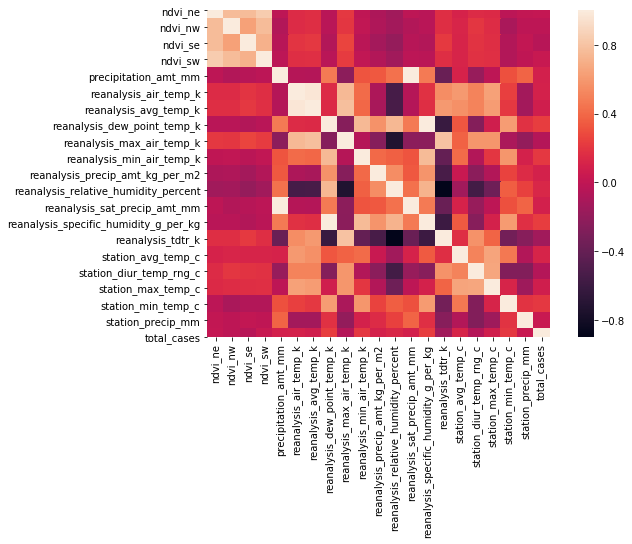

In [58]:
plt.figure(figsize = (10,6))
sns.heatmap(
    corr, 
    square=True#, 
    #annot=True
    )

In [0]:
# Funcion para determinar las columnas mas correlacionadas
def altamenteCorrelacionados(mydataframe, numtoreport):
    # Buscar La Correlacion
    cormatrix = mydataframe.corr()
    # establece las correlaciones en el triángulo 
    # diagonal o inferior a cero para que no sean reportados como los más altos:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # Enccontrar las mejores correlaciones
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # Renombrando las Columnas :-)
    cormatrix.columns = ["Variable 1", "Variable 2", "Correlacion"]
    return cormatrix.head(numtoreport)


In [60]:
corr_list

['ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'precipitation_amt_mm',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_avg_temp_c',
 'station_diur_temp_rng_c',
 'station_max_temp_c',
 'station_min_temp_c',
 'station_precip_mm',
 'total_cases']

In [96]:
altamenteCorrelacionados(dengueData,20)

,Variable 1,Variable 2,Correlacion
0,precipitation_amt_mm,reanalysis_sat_precip_amt_mm,1.000000
1,reanalysis_dew_point_temp_k,reanalysis_specific_humidity_g_per_kg,0.997775
2,reanalysis_air_temp_k,reanalysis_avg_temp_k,0.973319
3,reanalysis_relative_humidity_percent,reanalysis_tdtr_k,-0.896491
4,ndvi_ne,ndvi_sw,0.842784
5,reanalysis_max_air_temp_k,reanalysis_tdtr_k,0.799293
6,reanalysis_avg_temp_k,reanalysis_max_air_temp_k,0.783955
7,ndvi_ne,ndvi_se,0.767745
8,ndvi_nw,ndvi_sw,0.764829
9,ndvi_ne,ndvi_nw,0.764407


**La mayoría de los predictores altamente correlacionados con total_cases**



Los casos totales tienen un nivel muy bajo de correlación con los predictores potenciales.



Tenemos que revisar la relación con las variables rezagadas para tener en cuenta el ciclo de vida del mosquito y el tiempo entre la infección y los síntomas.

In [62]:
corr_val = corr.iloc[-1][:-1]
corr_val.sort_values()


reanalysis_tdtr_k                       -0.134425
station_diur_temp_rng_c                 -0.058230
reanalysis_max_air_temp_k               -0.056474
ndvi_se                                 -0.041067
ndvi_nw                                 -0.009586
ndvi_ne                                  0.020215
ndvi_sw                                  0.032999
station_precip_mm                        0.042976
station_max_temp_c                       0.075279
reanalysis_avg_temp_k                    0.079872
reanalysis_sat_precip_amt_mm             0.090171
precipitation_amt_mm                     0.090171
reanalysis_air_temp_k                    0.097098
reanalysis_precip_amt_kg_per_m2          0.101171
station_avg_temp_c                       0.113070
reanalysis_relative_humidity_percent     0.130083
station_min_temp_c                       0.211702
reanalysis_min_air_temp_k                0.214514
reanalysis_dew_point_temp_k              0.230401
reanalysis_specific_humidity_g_per_kg    0.236476


# Distribucion del Total de Casos

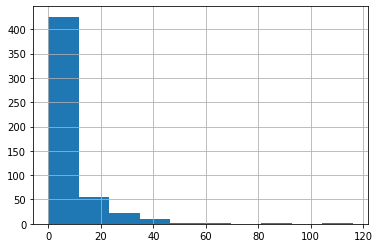

In [63]:
dengueData['total_cases'].hist()

In [64]:
print('Media de casos: ' + str(np.mean(dengueData['total_cases'])))
print('Varianza de casos: ' + str(np.var(dengueData['total_cases'])))


Media de casos: 7.565384615384615
Varianza de casos: 115.6726479289938


# Tendencias Totales

In [72]:
dengueData.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases', 'ano_1'],
      dtype='object')

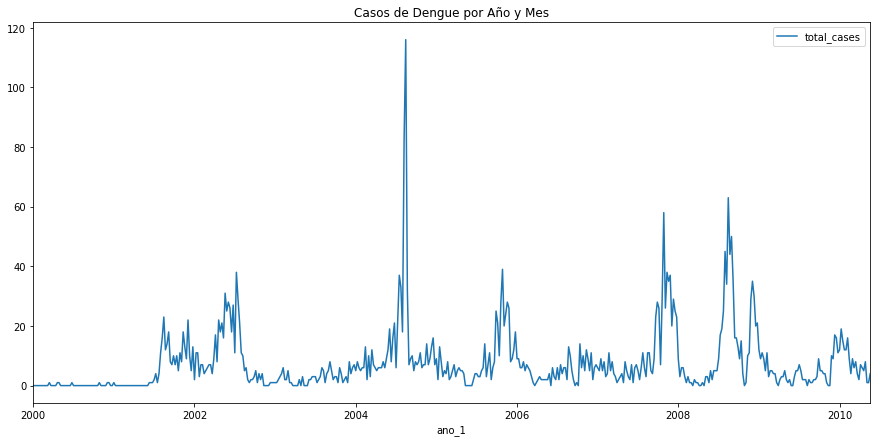

In [97]:
#dengueData['ano_semana_mes'] = dengueData['year'].map(str) + '-' + dengueData['weekofyear'].map(str)
tendencia = dengueData
tendencia['ano_1'] = tendencia['year'].map(str) 

tendencia.columns
tendencia.plot(kind='line',  x='ano_1', y='total_cases', figsize=[15,7],title='Casos de Dengue por Año y Mes')


In [98]:
dengueData.columns

Index(['year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases', 'ano_1'],
      dtype='object')

# Total de Casos VS Todos Los Predictores

In [104]:
predictors = dengueData.columns[:-2]
predictors

Index(['year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



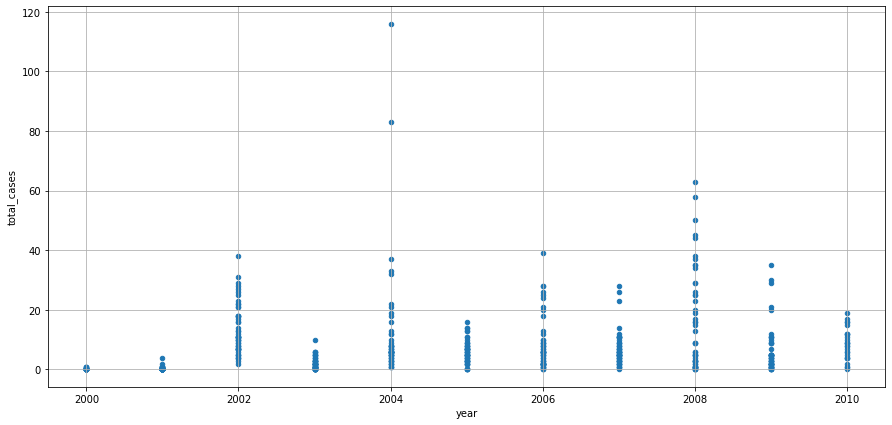

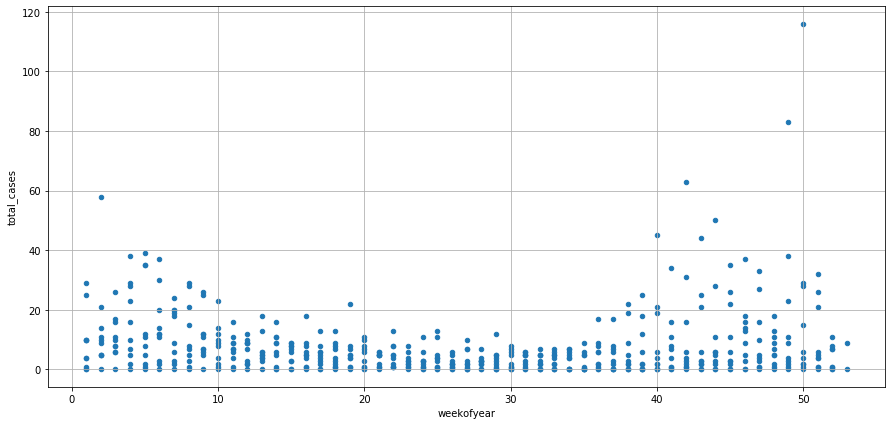

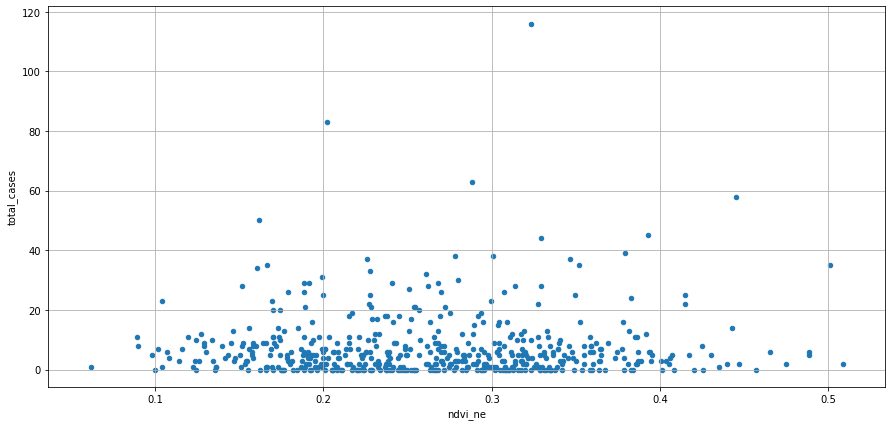

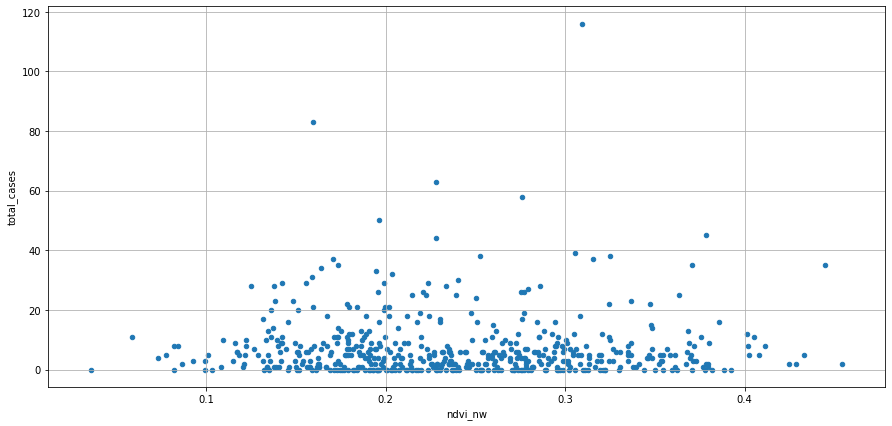

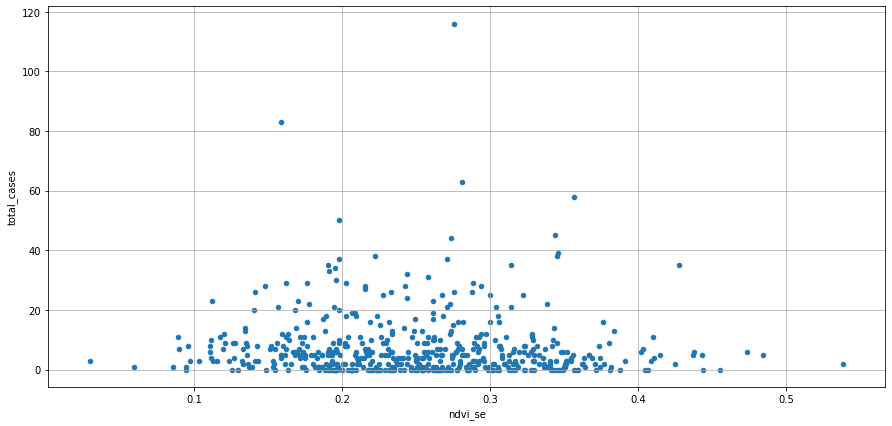

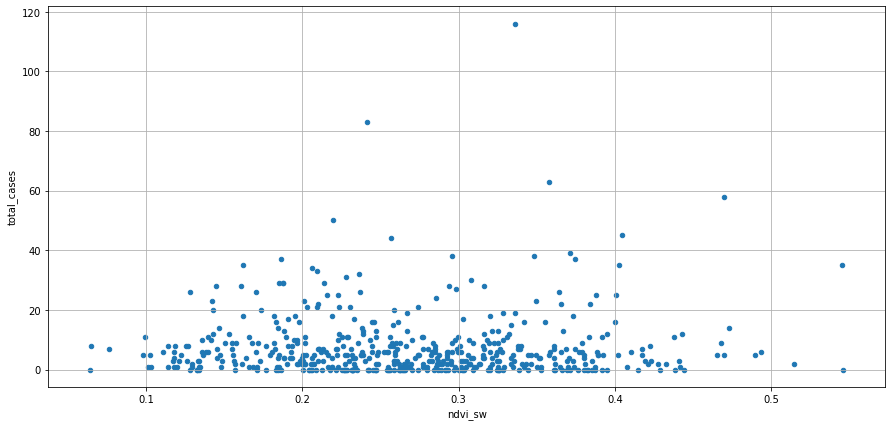

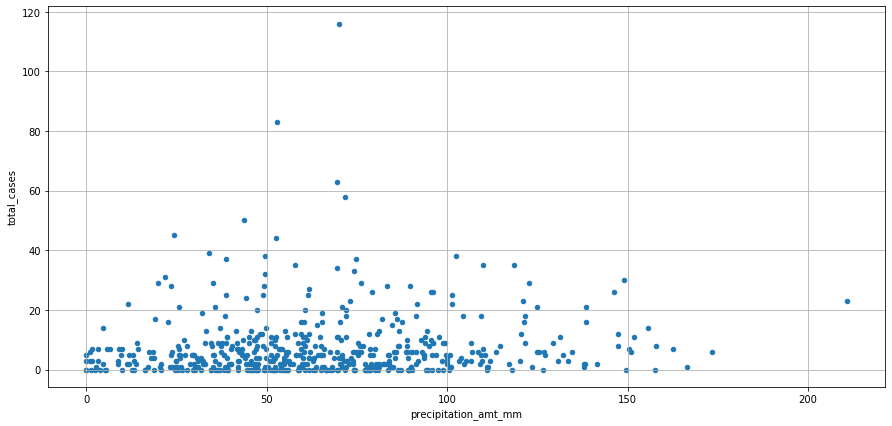

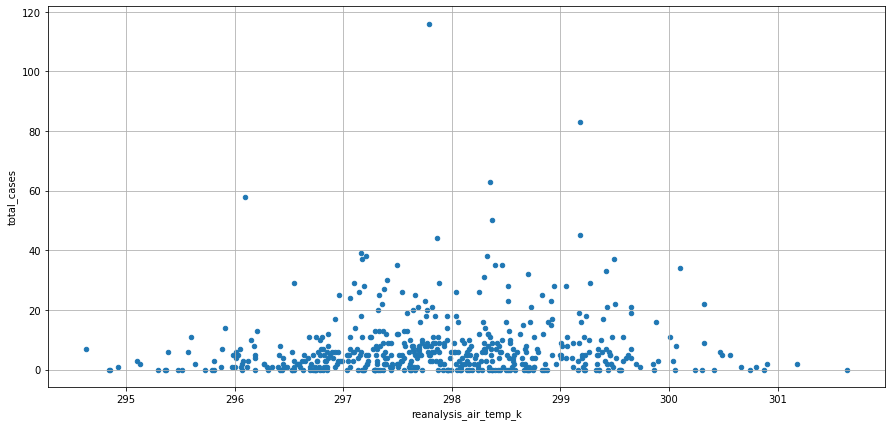

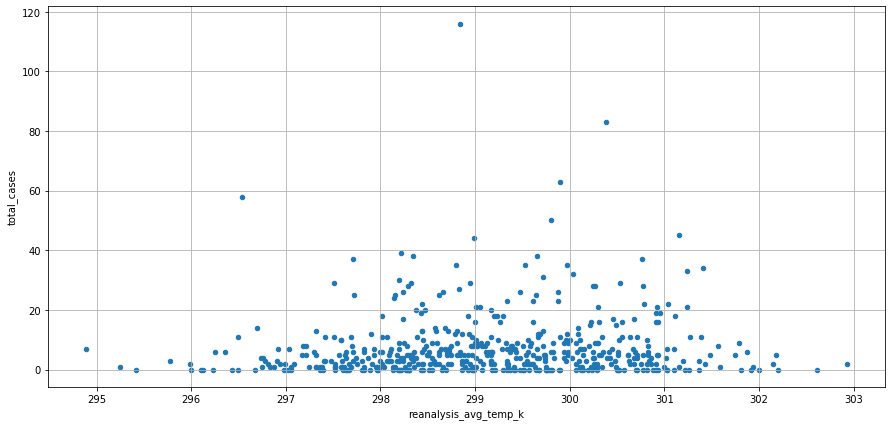

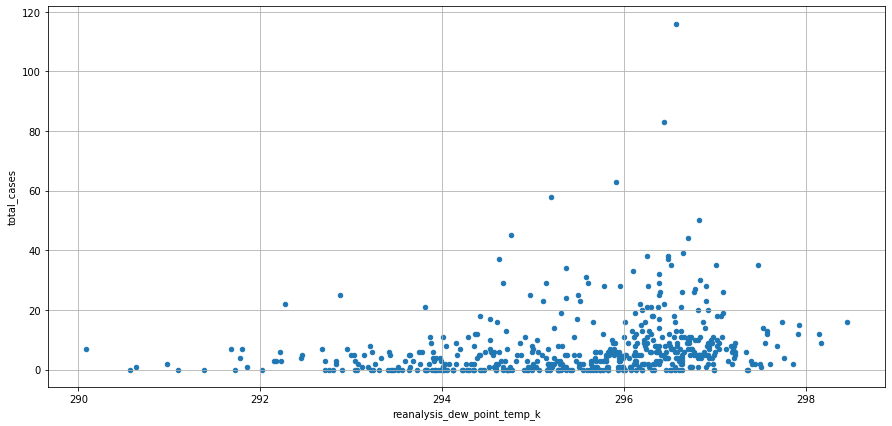

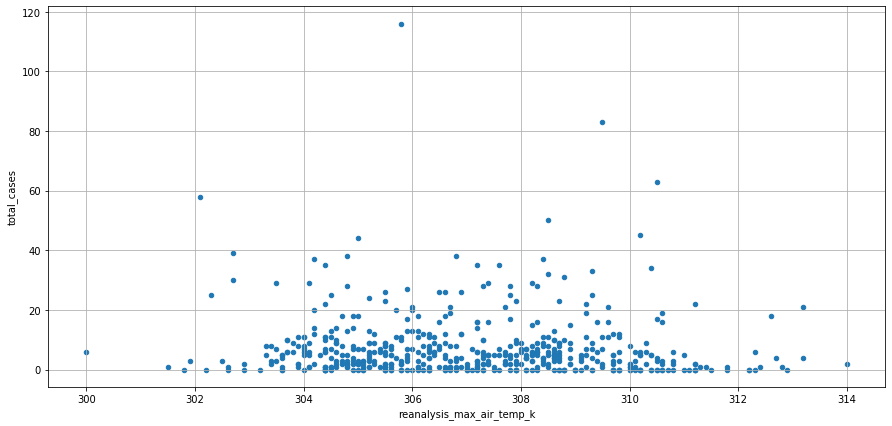

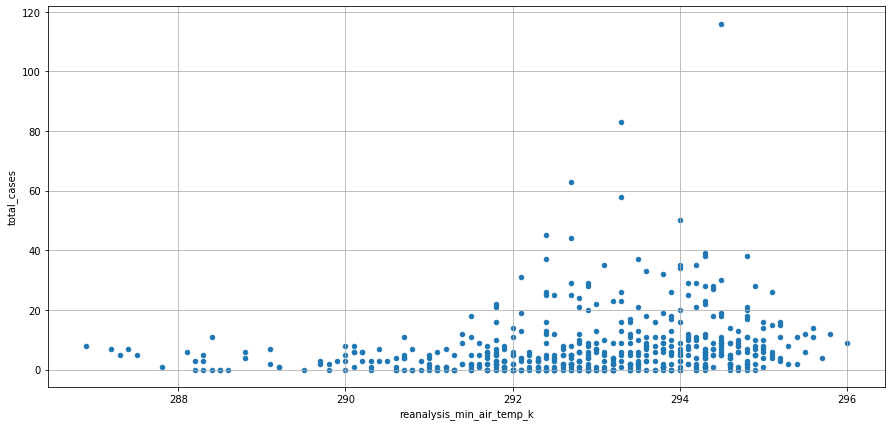

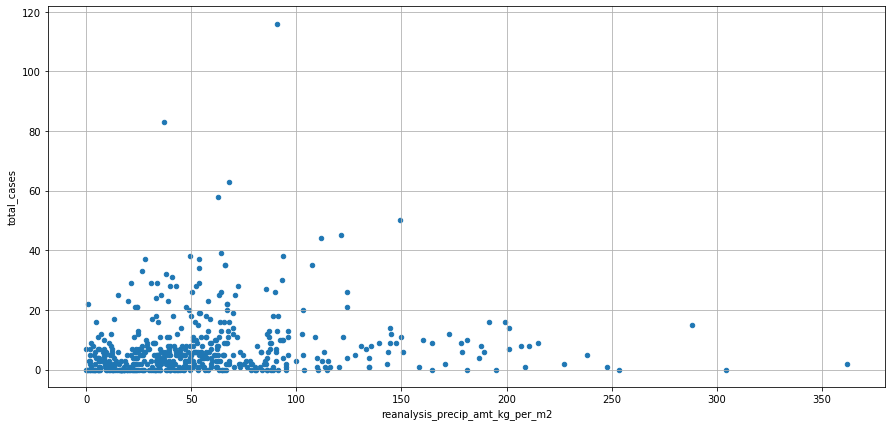

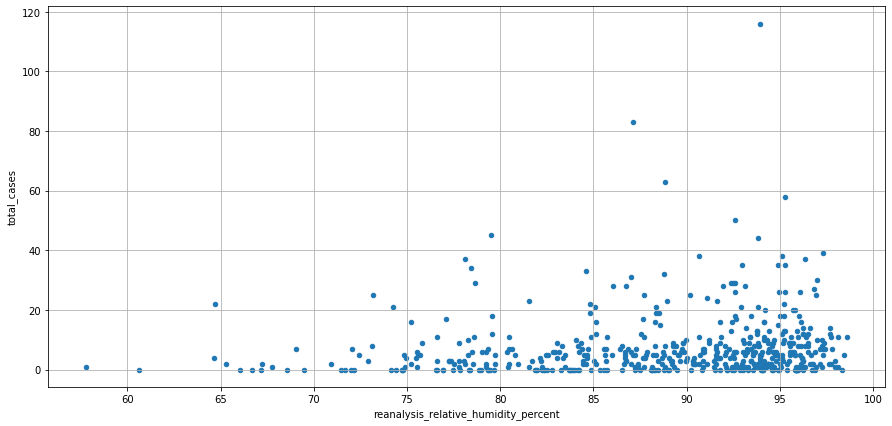

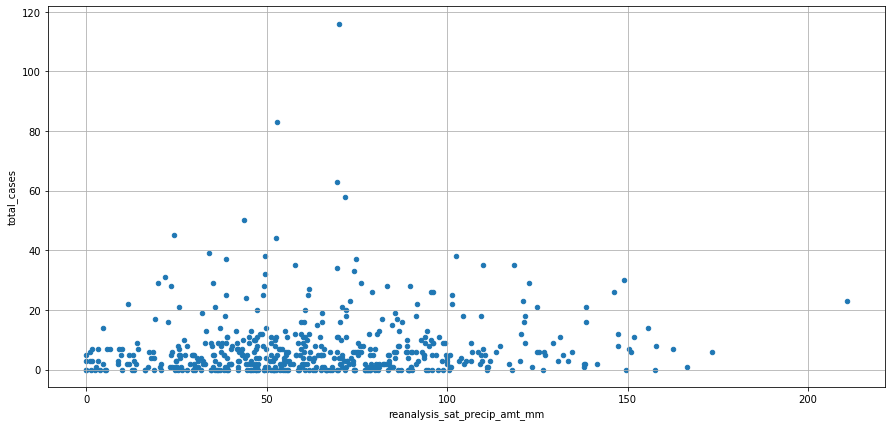

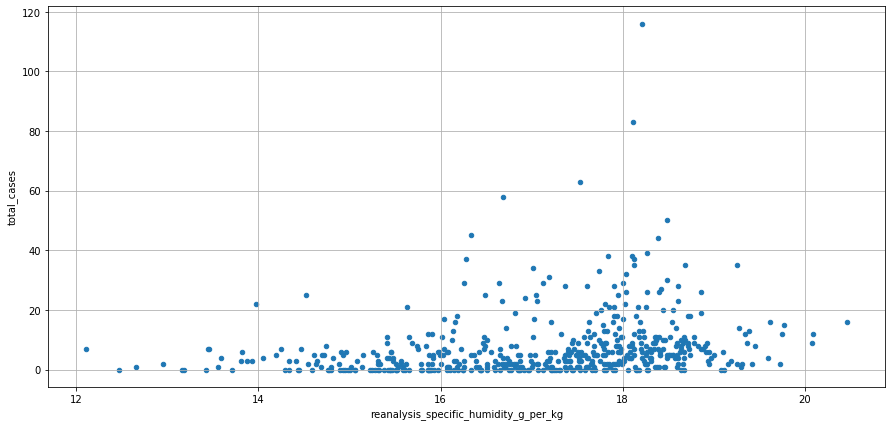

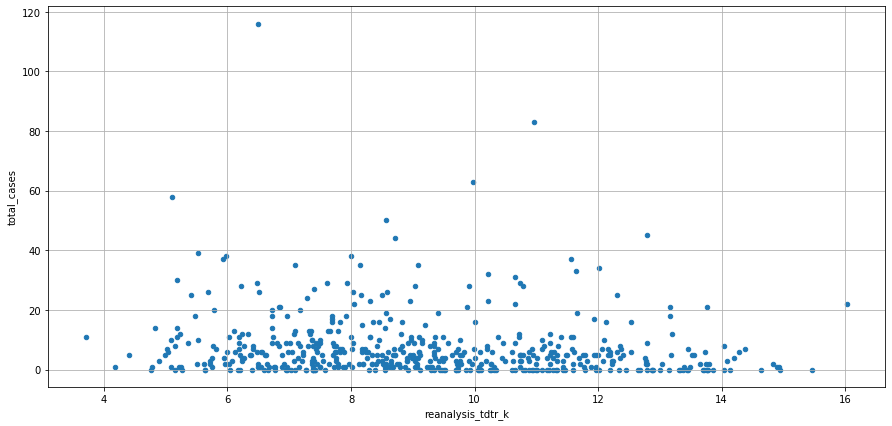

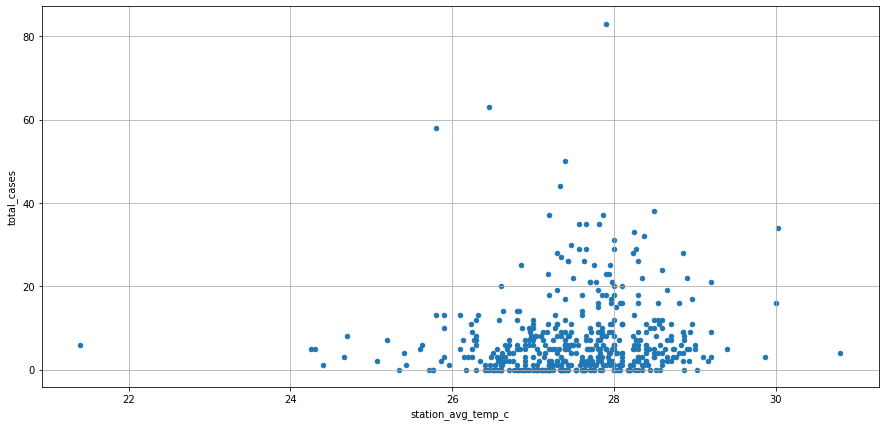

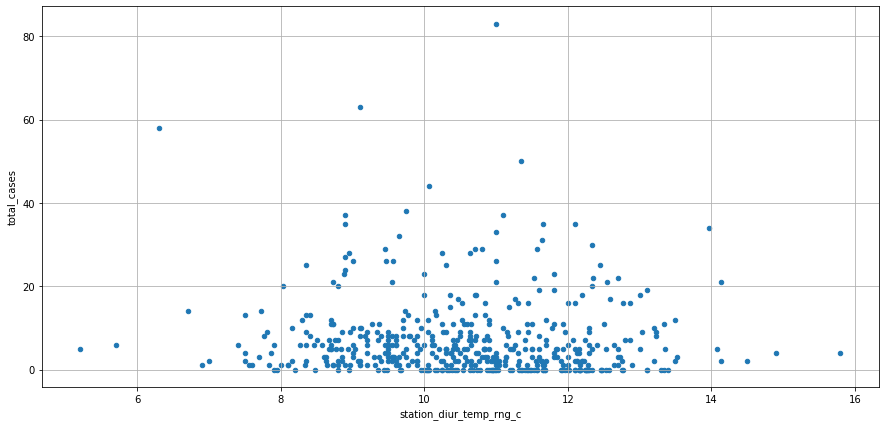

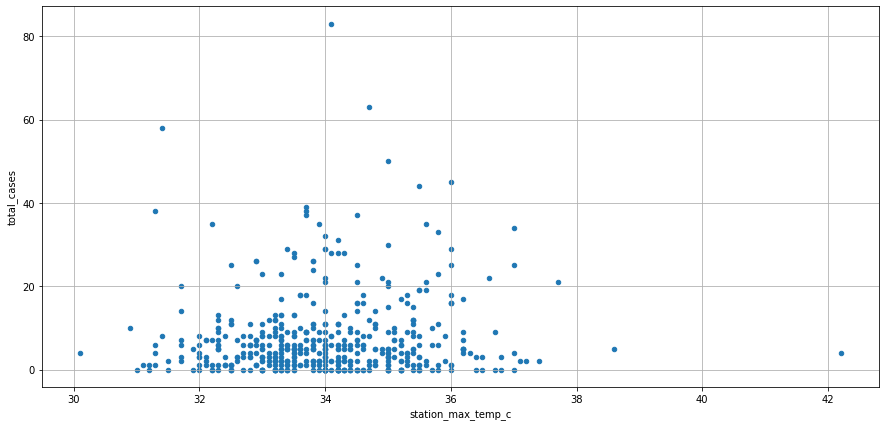

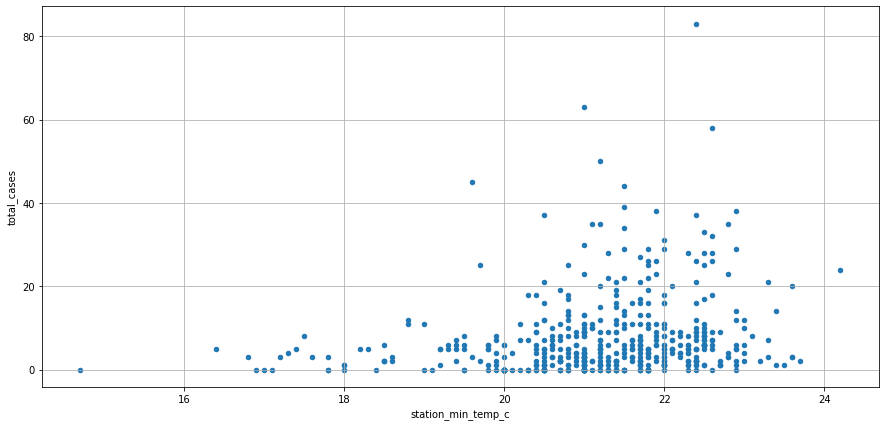

In [105]:
for i in predictors:
  dengueData.plot(kind='scatter',  
                  x=i, y='total_cases', 
                  figsize=[15,7], grid = 1
                  )

In [0]:
#imptVar = abs(corr).total_cases.drop('total_cases').sort_values(ascending = False).index[0:4]
#print(imptVar)

# Partiendo data en Train / Test 80-20

In [0]:
trainingSet, testSet = train_test_split(dengueData, test_size=0.3)

# Modelos

## Regresion Binomial Negativa

Intentamos encontrar el modelo binomial negativo más adecuado ajustando el hiperparámetro, alfa, entre el rango de 0.01 y 2.

In [268]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools import eval_measures

def binomial_negativa(train, cv):
    predictors = '+'.join(trainingSet.columns).replace('+total_cases', '') 
    formula =  'total_cases ~ ' + predictors
    alpha_grid = np.linspace(0.01, 2, 100)
    
    best_alpha = 0; best_mae = 1000
    
    for alpha in alpha_grid:
        model = smf.glm(formula = formula, data = train,
                        family = sm.families.NegativeBinomial(alpha = alpha))
        nb_model = model.fit()
        
        cv_pred = nb_model.predict(cv).fillna(0)
       
        mae = eval_measures.meanabs(cv_pred, cv.total_cases)
        
        if mae < best_mae:
            best_mae = mae
            best_alpha = alpha
            
    total = pd.concat([train, cv])
    
    print('Modelo Binomial Negativo: ' + str(best_mae))
    return smf.glm(formula = formula, data = total,
                   family = sm.families.NegativeBinomial(alpha = best_alpha)).fit()

binomial_negativa(trainingSet, testSet)


Modelo Binomial Negativo: 6.7457197684234185


In [0]:
print(testSet['total_cases'])

In [262]:
binomial_negativa(trainingSet, testSet)

17


In [233]:
testSet

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
38,2001,13,0.162380,0.150817,0.094657,0.132257,94.06,296.852857,297.600000,296.078571,303.2,292.8,304.52,95.924286,94.06,17.668571,6.200000,27.050,10.950,34.2,20.0,80.0,0
196,2004,15,0.359214,0.334843,0.279157,0.361271,47.26,297.812857,298.978571,297.175714,305.6,294.2,135.40,96.498571,47.26,18.825714,6.271429,27.650,9.500,33.1,22.3,4.0,8
236,2005,2,0.304414,0.361257,0.312600,0.315629,93.73,297.662857,298.842857,296.727143,307.6,291.6,96.21,95.530000,93.73,18.408571,7.228571,28.400,10.400,34.2,22.5,232.1,5
91,2002,14,0.197080,0.296229,0.180500,0.276329,94.01,297.174286,298.064286,296.741429,303.9,294.5,122.30,97.775714,94.01,18.395714,6.185714,27.300,10.400,32.5,20.2,20.1,11
14,2000,40,0.337540,0.276943,0.277500,0.255050,46.22,298.372857,300.500000,294.664286,309.8,292.7,16.60,82.371429,46.22,16.148571,11.971429,26.700,11.675,34.0,20.0,63.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,2009,42,0.297414,0.282171,0.255929,0.319786,30.49,299.737143,301.000000,295.350000,311.3,293.8,18.10,79.222857,30.49,16.895714,11.885714,27.750,10.650,34.2,21.2,11.2,1
207,2004,26,0.239233,0.153543,0.132829,0.197043,32.95,295.634286,296.814286,293.860000,304.2,289.8,25.90,90.447143,32.95,15.312857,8.400000,25.075,9.075,32.1,18.6,98.5,2
163,2003,34,0.425243,0.362483,0.356614,0.385529,45.38,297.365714,298.857143,293.511429,308.1,292.0,35.10,81.942857,45.38,15.010000,10.057143,27.750,11.900,34.0,20.0,18.3,0
20,2000,46,0.099933,0.035860,0.195486,0.064183,39.25,301.637143,302.614286,294.232857,311.8,294.2,3.60,67.185714,39.25,15.880000,13.371429,29.025,13.100,36.4,21.7,0.0,0
